# Transient Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Charging RC Circuit

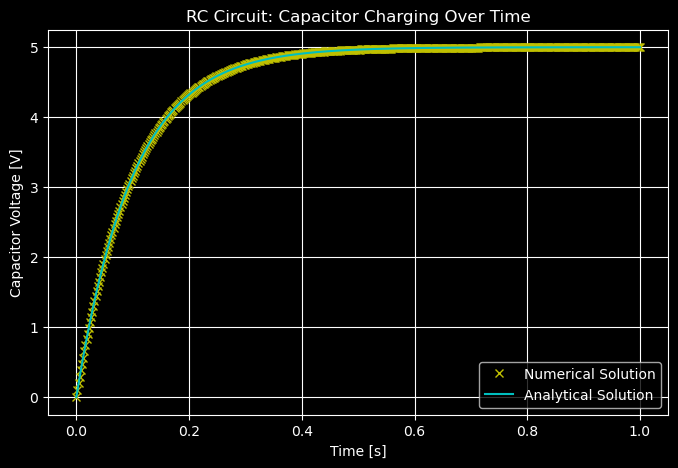

In [2]:
# --- Parameters ---
R = 1e3       # resistance in ohms
C = 100e-6    # capacitance in farads
Vs = 5        # supply voltage in volts

# --- Differential equation: dVc/dt = (Vs - Vc) / (R*C) ---
def dVcdt(t, Vc):
    return (Vs - Vc) / (R * C)

# --- Time range and initial condition ---
t_span = (0, 1)           # simulate for 1 second
Vc0 = [0]                 # initial voltage (capacitor initially uncharged)
t_eval = np.linspace(*t_span, 500)

# --- Solve ODE ---
solution = solve_ivp(dVcdt, t_span, Vc0, t_eval=t_eval)

# --- Analytical solution for comparison ---
Vc_analytical = Vs * (1 - np.exp(-solution.t / (R * C)))

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(solution.t, solution.y[0], 'yx', label='Numerical Solution')
plt.plot(solution.t, Vc_analytical, 'c', label='Analytical Solution')
plt.title('RC Circuit: Capacitor Charging Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Capacitor Voltage [V]')
plt.grid(True)
plt.legend()
plt.show()


## Charging RC Circuit (Current)

What does the current through $C$ look like during this charging process?

$$
i_C(t) = C \frac{dV_C(t)}{dt} = \frac{V_0}{R} e^{-\frac{t}{RC}}\left(v_C(\infty)-v_C(0)\right)
$$

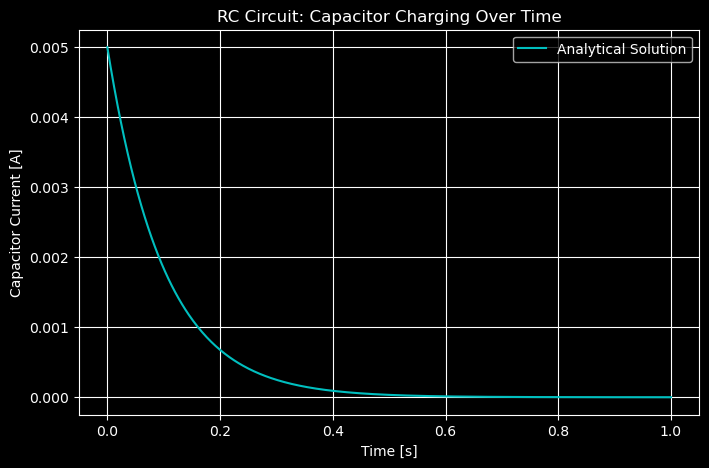

In [3]:
Ic_analytical = (Vs / R) * np.exp(-solution.t / (R * C))

# --- Plot ---
plt.figure(figsize=(8,5))
# plt.plot(solution.t, solution.y[0], 'b', label='Numerical Solution')
plt.plot(solution.t, Ic_analytical, 'c', label='Analytical Solution')
plt.title('RC Circuit: Capacitor Charging Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Capacitor Current [A]')
plt.grid(True)
plt.legend()
plt.show()

Note the discontinuity at time t=0. This is because the capacitor initially behaves like a short circuit, allowing maximum current to flow. As the capacitor charges, the voltage across it increases, reducing the current until it eventually reaches zero when the capacitor is fully charged.

## Discharging RC Circuit

Draw a circuit that allows a capacitor to discharge through a resistor when a switch is moved to position 2 at time t=0.

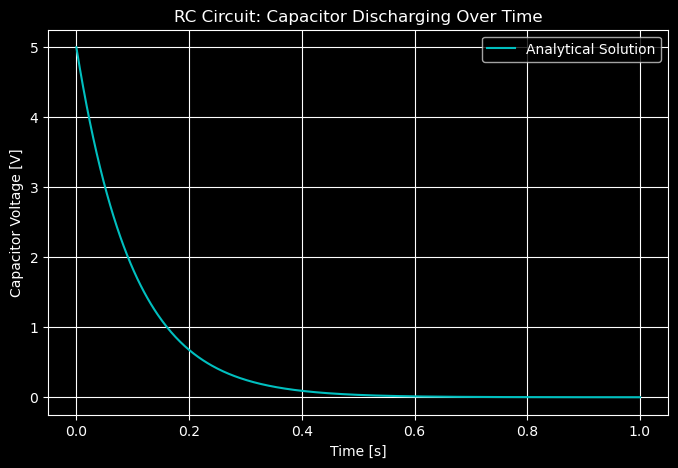

In [4]:
Vc_analytical = Vs * np.exp(-solution.t / (R * C))

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(solution.t, Vc_analytical, 'c', label='Analytical Solution')
plt.title('RC Circuit: Capacitor Discharging Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Capacitor Voltage [V]')
plt.grid(True)
plt.legend()
plt.show()

What is $V_c(t < 0)$?

When the switch is moved to position 2 at time t=0, the capacitor begins to discharge through the resistor.  Prior to that, it is at the steady-state voltage from being charge.